# Tfidf Vectorizer with Multinomial Naive Bayes analysis 

In [57]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
shoes = pd.read_csv('datasets/shoes_data.csv')

In [17]:
shoes.head()

,title_token,title_tokens_merged,subreddit
0,"['ordered', 'a', 'pair', 'of', 'these', 'my', ...",ordered a pair of these my first 327 s im in love,Newbalance
1,"['started', 'grey', 'day', 'getting', 'a', 'li...",started grey day getting a lil hooked,Newbalance
2,"['started', 'grey', 'day', 'getting', 'a', 'li...",started grey day getting a lil hooked,Newbalance
3,"['started', 'on', 'grey', 'day', 'getting', 'a...",started on grey day getting a lil hooked,Newbalance
4,"['when', 'will', 'these', 'drop', 'on', 'the',...",when will these drop on the nb website i have ...,Newbalance


In [18]:
shoes.isnull().sum()

title_token            0
title_tokens_merged    0
subreddit              0
dtype: int64

In [19]:
shoes = shoes.dropna()

### Define X and y

In [20]:
X = shoes['title_tokens_merged']
y = shoes['subreddit']

## Baseline accuracy score (score to beat)

In [21]:
y.value_counts(normalize=True)

Newbalance    0.500251
Nike          0.499749
Name: subreddit, dtype: float64

### Split the data into train and test data 

In [22]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
X_test

774     beat the everliving shit out of these tending ...
969                                  wide footer question
345     m990ry v4 cameo because my dad came by with so...
276                                     f you new balance
742                  couple dope 574 i picked up recently
                              ...                        
1497    hey guys i ve got a pair of nike dunk high rai...
474                            can anyone id these for me
1953    would you guys file a warranty return on this ...
1794    how do you guys feel on the purple pulses i pi...
811     thoughts on the 57 40 personally i feel like t...
Name: title_tokens_merged, Length: 658, dtype: object

### Instantiate the Tfidf Vectorizer 

In [24]:
# Instantiate a CountVectorizer.
tfv = TfidfVectorizer(stop_words='english')

### Fit the train data onto the Tfidf Vectorizer (transformer)

In [25]:
tfv.fit(X_train)

TfidfVectorizer(stop_words='english')

In [26]:
len(tfv.get_feature_names()) # number of unique words

2182

In [27]:
tfv.get_feature_names()[1010:1025]

['inner',
 'innovate',
 'inquiry',
 'insane',
 'inside',
 'insole',
 'insoles',
 'inspired',
 'insta',
 'instagram',
 'instructions',
 'intelligent',
 'interested',
 'interesting',
 'international']

In [28]:
tfv.vocabulary_

{'consolation': 526,
 'price': 1504,
 'came': 405,
 'mail': 1219,
 'today': 1953,
 'know': 1089,
 'fix': 793,
 'yellowing': 2167,
 '993s': 173,
 'lpu': 1181,
 '992ca': 168,
 'lc': 1113,
 'nike': 1348,
 'react': 1558,
 '87': 129,
 'stockx': 1835,
 'nb': 1325,
 '574': 103,
 'size': 1750,
 'm992lt': 1210,
 'better': 329,
 'person': 1438,
 'expected': 729,
 'rolling': 1645,
 'head': 929,
 'turners': 2000,
 'release': 1590,
 'year': 2164,
 'wear': 2103,
 'care': 415,
 '10': 5,
 'years': 2165,
 'hello': 938,
 'help': 939,
 'identity': 991,
 'trousers': 1992,
 'pls': 1464,
 'gonna': 868,
 'try': 1994,
 'levi': 1133,
 'collabs': 483,
 'tmr': 1952,
 'tips': 1951,
 'queue': 1540,
 'quick': 1541,
 'tech': 1903,
 'fleece': 798,
 'look': 1164,
 'real': 1562,
 'v2': 2044,
 'recently': 1571,
 '1980s': 33,
 'baby': 295,
 'sneakers': 1773,
 'garage': 841,
 'sale': 1664,
 'need': 1333,
 'identifying': 990,
 'style': 1856,
 'possible': 1483,
 'value': 2056,
 'thank': 1919,
 'information': 1007,
 'rocking

In [29]:
pd.DataFrame(tfv.vocabulary_, index=['index']).T.sort_values(by='index')

,index
00,0
001,1
0011,2
00am,3
07,4
...,...
zag,2177
zig,2178
zip,2179
zone,2180


### Start analysis by transforming the corpus with the Tfidf Vectorizer 

In [30]:
# Transform the corpus.
X_train = tfv.transform(X_train)

In [31]:
X_test = tfv.transform(X_test)

### Create dataframe of the vocabulary present in the dataset

In [32]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=tfv.get_feature_names())

In [33]:
X_train_df.head()

,00,001,0011,00am,07,10,100,1080,1080v11,10x,...,yooou,young,youtu,youtube,youtuber,zag,zig,zip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get the top 15 words present in the dataset

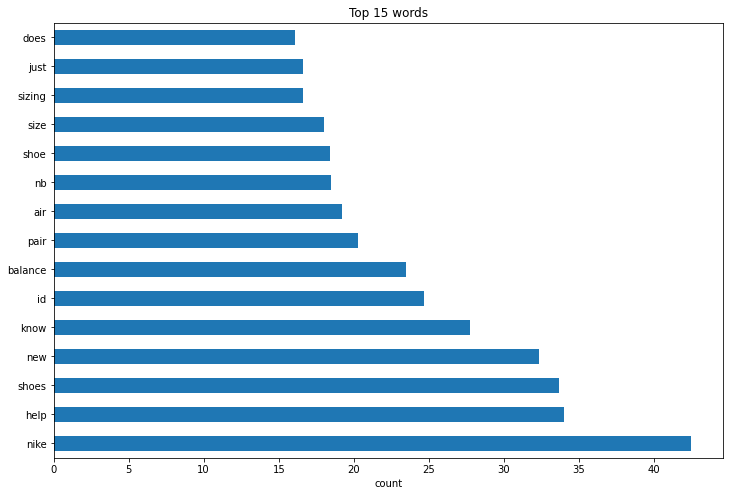

In [34]:
plt.figure(figsize=(12,8))
plt.xlabel('count')
plt.title('Top 15 words')
X_train_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

plt.savefig('visuals/top_15_words_tfv.jpeg')

### Redefine the training and testing sets for pipe analysis 

##### Data was already transformed on the Count Vectorizer so we need to redefine 

In [35]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [36]:
X_train

305            a consolation price came in the mail today
692      anyone know how to fix this yellowing on my 993s
694                                             lpu 992ca
1625                      lc on nike react 87 from stockx
953                                         nb 574 x size
                              ...                        
528      575sp today this shoe deserves to be in a museum
1508    what color model is this and what do you think...
1135              qc aj1 made me more confident in school
1294    can you help me identify the hoodie may be fak...
666     ml2002rr rain cloud on sale for 87 other nbs o...
Name: title_tokens_merged, Length: 1335, dtype: object

### Pipeline analysis of shoes dataset with Count Vectorizer and Multinomial Naive Bayes 

In [38]:
# 1. TfidfVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('tfv', TfidfVectorizer()), 
    ('mnb', MultinomialNB()),
    
])

In [39]:
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9400749063670412, 0.8358662613981763)

### Check out some predictions 

In [40]:
pipe.predict(['nike'])

array(['Nike'], dtype='<U10')

In [41]:
pipe.predict(['nike', 'new balance', '997', 'jordan'])

array(['Nike', 'Newbalance', 'Newbalance', 'Nike'], dtype='<U10')

### Gridsearch analysis with different hyperparameters for the Count Vectorizer 

In [42]:
pipe_params = {
    'tfv__stop_words':[None, 'english'],
    'tfv__max_features':[None, 5000],
    'tfv__ngram_range':[(1,1),(1,2)]
}

In [43]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params, 
                  cv=5)

In [44]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfv', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'tfv__max_features': [None, 5000],
                         'tfv__ngram_range': [(1, 1), (1, 2)],
                         'tfv__stop_words': [None, 'english']})

In [45]:
gs.best_score_

0.8471910112359551

In [46]:
gs.best_params_

{'tfv__max_features': None,
 'tfv__ngram_range': (1, 1),
 'tfv__stop_words': 'english'}

In [47]:
gs.score(X_test, y_test)

0.8389057750759878

In [49]:
gs.best_estimator_.named_steps['tfv']

TfidfVectorizer(stop_words='english')

In [50]:
X_test

774     beat the everliving shit out of these tending ...
969                                  wide footer question
345     m990ry v4 cameo because my dad came by with so...
276                                     f you new balance
742                  couple dope 574 i picked up recently
                              ...                        
1497    hey guys i ve got a pair of nike dunk high rai...
474                            can anyone id these for me
1953    would you guys file a warranty return on this ...
1794    how do you guys feel on the purple pulses i pi...
811     thoughts on the 57 40 personally i feel like t...
Name: title_tokens_merged, Length: 658, dtype: object

### Create dataframe of the predictions 

In [51]:
test_preds = gs.predict(X_test)

In [52]:
pred_df = pd.DataFrame({'test': X_test.values, 'true label':y_test.values, 'predicted label':test_preds})

In [53]:
pred_df

,test,true label,predicted label
0,beat the everliving shit out of these tending ...,Newbalance,Newbalance
1,wide footer question,Newbalance,Newbalance
2,m990ry v4 cameo because my dad came by with so...,Newbalance,Newbalance
3,f you new balance,Newbalance,Newbalance
4,couple dope 574 i picked up recently,Newbalance,Newbalance
...,...,...,...
653,hey guys i ve got a pair of nike dunk high rai...,Nike,Nike
654,can anyone id these for me,Newbalance,Nike
655,would you guys file a warranty return on this ...,Nike,Nike
656,how do you guys feel on the purple pulses i pi...,Nike,Nike


### Create dataframe with only the incorrectly predicted values

In [54]:
pred_df[pred_df['true label'] != pred_df['predicted label']].head(15)

,test,true label,predicted label
7,does anyone know what model this is,Newbalance,Nike
16,spilt coffee on the white toe box how do i cle...,Newbalance,Nike
21,is this okay,Nike,Newbalance
28,did a lil over laces swap for the off white du...,Nike,Newbalance
33,need help,Newbalance,Nike
38,yep there are some of them that are in the wild,Nike,Newbalance
42,daily poster challenge that i and my friend di...,Newbalance,Nike
43,so did anyone actually cop these pair of sexy ...,Nike,Newbalance
51,my father s day gift tn 1 triple black and a t...,Nike,Newbalance
61,pls help anyone identifies this shoe,Newbalance,Nike


### Plot the misclassifications with a confusion matrix 

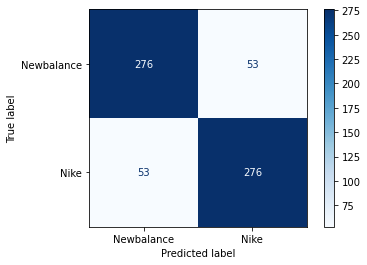

In [59]:
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');
plt.savefig('visuals/confusion_matrix_tfv_mnb.jpeg')

### Get the report of the predictions including precision, accuracy, etc. 

In [58]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

  Newbalance       0.84      0.84      0.84       329
        Nike       0.84      0.84      0.84       329

    accuracy                           0.84       658
   macro avg       0.84      0.84      0.84       658
weighted avg       0.84      0.84      0.84       658

